## House Prices Competition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Intro

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
display(train.shape)
display(train.head())
display(test.shape)
display(test.head())

(1460, 81)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1459, 80)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
print(train.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [5]:
# check for missing values by printing the percentage of only the columns with missing values

null_percentage = train.isnull().mean() * 100
null_percentage = null_percentage[null_percentage > 0].round(2)
display(null_percentage)


LotFrontage     17.74
Alley           93.77
MasVnrType      59.73
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

## **Features EDA + ENG**

#### Id
Id has no value in the prediction of cost. We do not drop it since it is needed for submission in the format:

'Id', 'SalePrice'

Instead we make it as index in both, test and train set

In [6]:
train.set_index('Id', inplace=True)
test.set_index('Id', inplace=True)

train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### MSSubClass

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64


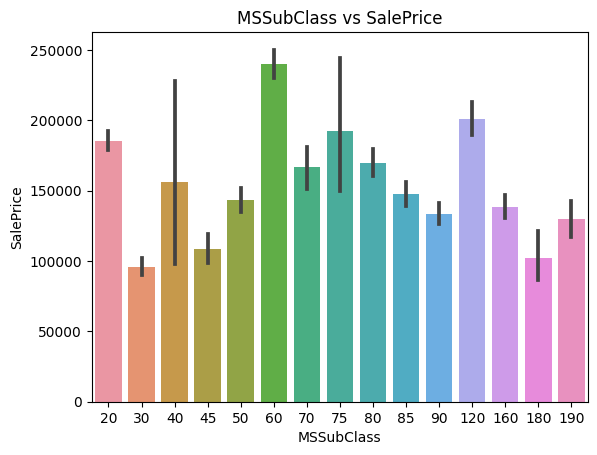

In [7]:
# print MSSubClass value counts

print(train['MSSubClass'].value_counts())

# plot the MSSubClass vs SalePrice

sns.barplot(x='MSSubClass', y='SalePrice', data=train)
plt.title('MSSubClass vs SalePrice')
plt.show()

# change the MSSubClass to categorical data

train['MSSubClass'] = train['MSSubClass'].astype('category')
test['MSSubClass'] = test['MSSubClass'].astype('category')

There seems to be a correlation between the house type and the price. It's expected as newer houses have higher price.

#### MSZoning 

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


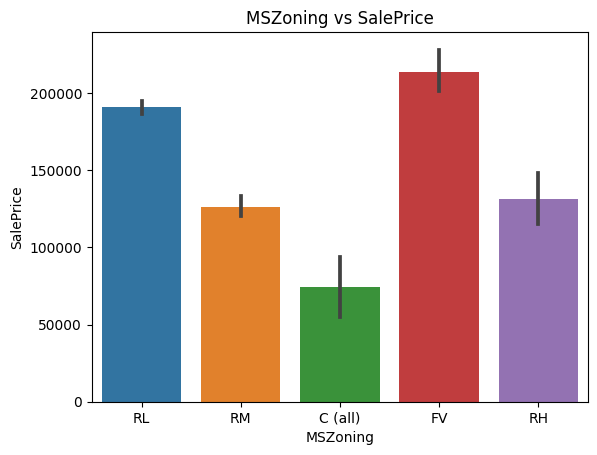

In [8]:
print(train['MSZoning'].value_counts())

sns.barplot(x='MSZoning', y='SalePrice', data=train)
plt.title('MSZoning vs SalePrice')
plt.show()

#### LotFrontage

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64


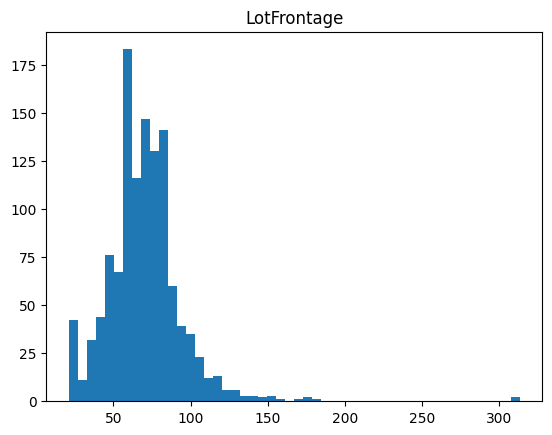

In [9]:
print(train['LotFrontage'].value_counts())

plt.hist(train['LotFrontage'], bins=50)
plt.title('LotFrontage')
plt.show()

Not much to deduct anything. Let's try to divide it for eight categories.

LotFrontageCategory
Medium       897
Low          481
High          73
Very High      9
Name: count, dtype: int64


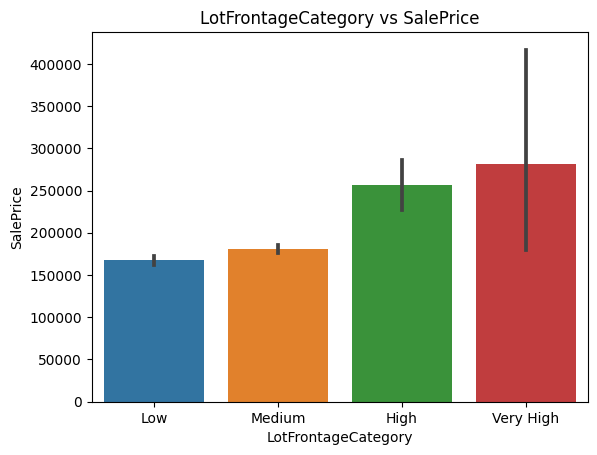

In [10]:
train['LotFrontageCategory'] = 'Low'

train.loc[(train['LotFrontage']>51) & (train['LotFrontage']<=100), 'LotFrontageCategory'] = 'Medium'
train.loc[(train['LotFrontage']>101) & (train['LotFrontage']<=150), 'LotFrontageCategory'] = 'High'
train.loc[(train['LotFrontage']>151), 'LotFrontageCategory'] = 'Very High'


test['LotFrontageCategory'] = 'Low'

test.loc[(test['LotFrontage']>51) & (test['LotFrontage']<=100), 'LotFrontageCategory'] = 'Medium'
test.loc[(test['LotFrontage']>101) & (test['LotFrontage']<=150), 'LotFrontageCategory'] = 'High'
test.loc[(test['LotFrontage']>151), 'LotFrontageCategory'] = 'Very High'

category_order = ["Low", "Medium", "High", "Very High"]

print(train.LotFrontageCategory.value_counts())


sns.barplot(x='LotFrontageCategory', y='SalePrice', data=train, order=category_order)
plt.title('LotFrontageCategory vs SalePrice')
plt.show()

While distribution is imbalanced, there isn't a clear difference in sale price and linear feet of street connected to property. To be treated carufully.

#### LotArea 

A histogram will show the distribution of the cost of the ticket.

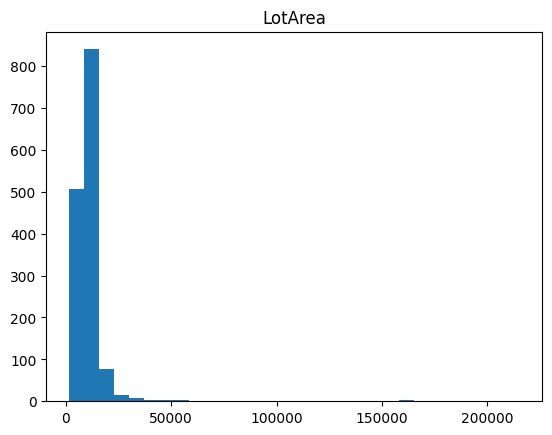

In [11]:
plt.hist(train['LotArea'], bins=30)
plt.title('LotArea')
plt.show()

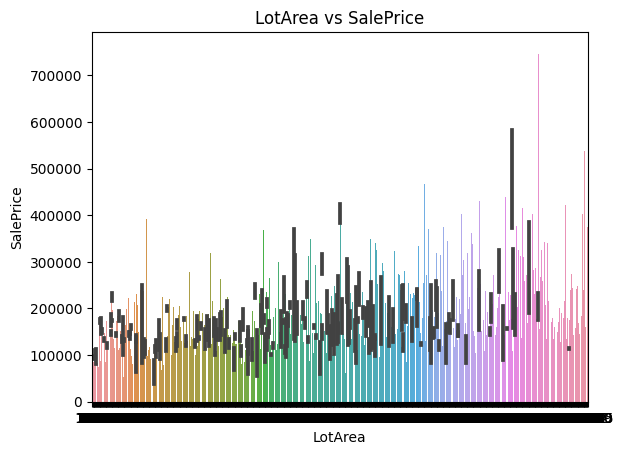

In [12]:
sns.barplot(x='LotArea', y='SalePrice', data=train)
plt.title('LotArea vs SalePrice')
plt.show()

In [13]:
numer_features = ["Id", "MSSubClass", "LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearBuild",
                  "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF",
                  "2ndFlrSf", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath",
                  "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars",
                  "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea",
                  "MiscVal", "MoSold", "YrSold", "SalePrice"]
categor_features = ["MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope",
                    "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl",
                    "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual",
                    "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir",
                    "Electrical", "KitchenQual", "Functional", "GarageType", "GarageFinish", "GarageQual", "GarageCond",
                    "PavedDrive", "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition"]